# ПЕРЦЕПТРОН

In [39]:
from IPython.display import Image

![jupyter](.\imgs\perceptron_1.jpg)

![jupyter](.\imgs\perceptron_2.jpg)

![jupyter](.\imgs\perceptron_3.jpg)

![jupyter](.\imgs\perceptron_4.jpg)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

In [26]:
class dlnet:
    def __init__(self, x, y):
        self.X=x  # входные данные
        self.Y=y  # размеченные данные, target
        self.Yh=np.zeros((1,self.Y.shape[1]))  # реальный выход перцептрона
        self.L=2  # количество слоев
        self.dims = [9, 15, 1]  # 9 фичей на вход, 15 нейронов в скрытом слое,
                                # 1 нейрон на выходе
        self.param = {}  # параметры и базисы для каждого слоя
        self.ch = {}  # кэш для вякого
        self.grad = {}  #
        self.loss = []  # для хранения значений лоссов
        self.lr=0.003
        self.sam = self.Y.shape[1]  # количество тренировачных образцов
        
    def nInit(self):   
        """
        Инициализирует начальные параметры для сети
        """
        np.random.seed(1)
        
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0]) 
        self.param['b1'] = np.zeros((self.dims[1], 1))        
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1]) 
        self.param['b2'] = np.zeros((self.dims[2], 1))                
        return
    
    def Sigmoid(self, Z):
        return 1/(1+np.exp(-Z))
    
    def Relu(self, Z):
        return np.maximum(0,Z)
    
    def forward(self):
        # первый слой   
        Z1 = self.param['W1'].dot(self.X) + self.param['b1'] 
        # функция активации
        A1 = self.Relu(Z1)
        # сохраняем в кэш результаты
        self.ch['Z1'],self.ch['A1']=Z1,A1
        # второй слой
        Z2 = self.param['W2'].dot(A1) + self.param['b2']
        # функция активации
        A2 = self.Sigmoid(Z2)
        # сохраняем в кэш результаты
        self.ch['Z2'],self.ch['A2']=Z2,A2
        # выход сети
        self.Yh=A2
        # считаем лоссы
        loss=self.nloss(A2)
        return self.Yh, loss
    
    def nloss(self,Yh):
        # кросс-энтропия
        loss = (1./self.sam) * (-np.sdot(self.Y,np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))    
        return loss
    
    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def dSigmoid(self, Z):
        s = 1/(1+np.exp(-Z))
        dZ = s * (1-s)
        return dZ
    
    def backward(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))    

        dLoss_Z2 = dLoss_Yh * self.dSigmoid(self.ch['Z2'])    
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
        dLoss_W2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2,self.ch['A1'].T)
        dLoss_b2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1])) 

        dLoss_Z1 = dLoss_A1 * self.dRelu(self.ch['Z1'])        
        dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
        dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
        dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))  

        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2

    def gd(self,X, Y, iter = 3000):
        np.random.seed(1)                         
    
        self.nInit()
    
        for i in range(0, iter):
            Yh, loss=self.forward()
            self.backward()
        
            if i % 500 == 0:
                print ("Cost after iteration %i: %f" %(i, loss))
                self.loss.append(loss)
    
        return
    
    def pred(self,x, y):  
        self.X=x
        self.Y=y
        comp = np.zeros((1,x.shape[1]))
        pred, loss= self.forward()    

        for i in range(0, pred.shape[1]):
            if pred[0,i] > 0.5: comp[0,i] = 1
            else: comp[0,i] = 0

        print("Acc: " + str(np.sum((comp == y)/x.shape[1])))

        return comp

In [27]:
data_path = 'breast-cancer-wisconsin.data'
df = pd.read_csv(data_path, header=None)

In [28]:
df[:15]

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [29]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [30]:
df.iloc[:,10].replace(2, 0,inplace=True)
df.iloc[:,10].replace(4, 1,inplace=True)

In [31]:
df = df[~df[6].isin(['?'])]

In [32]:
df = df.astype(float)

In [33]:
names = df.columns[0:10]
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df.iloc[:,0:10]) 
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [34]:
scaled_df[:15]

,0,1,2,3,4,5,6,7,8,9
0,0.069946,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
1,0.070164,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000
2,0.071096,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000
3,0.071160,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000
4,0.071216,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000
5,0.071223,0.777778,1.000000,1.000000,0.777778,0.666667,1.000000,0.888889,0.666667,0.000000
6,0.071296,0.000000,0.000000,0.000000,0.000000,0.111111,1.000000,0.222222,0.000000,0.000000
7,0.071331,0.111111,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
8,0.072415,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.444444
9,0.072415,0.333333,0.111111,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000


<AxesSubplot:ylabel='Frequency'>

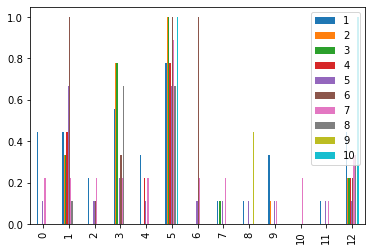

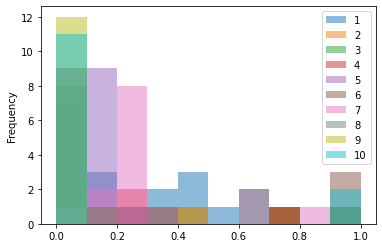

In [35]:
scaled_df[10]= df[10]
scaled_df.iloc[0:13,1:11].plot.bar();
scaled_df.iloc[0:13,1:11].plot.hist(alpha=0.5)

In [36]:
x=scaled_df.iloc[0:500,1:10].values.transpose()
y=df.iloc[0:500,10:].values.transpose()
xval=scaled_df.iloc[501:683,1:10].values.transpose()
yval=df.iloc[501:683,10:].values.transpose()

In [37]:
nn = dlnet(x,y)
nn.lr=0.01
nn.dims = [9, 15, 1]
nn.gd(x, y, iter = 15000)

Cost after iteration 0: 0.673967
Cost after iteration 500: 0.388928
Cost after iteration 1000: 0.231340
Cost after iteration 1500: 0.171447
Cost after iteration 2000: 0.146433
Cost after iteration 2500: 0.133993
Cost after iteration 3000: 0.126808
Cost after iteration 3500: 0.122107
Cost after iteration 4000: 0.118650
Cost after iteration 4500: 0.116027
Cost after iteration 5000: 0.113934
Cost after iteration 5500: 0.112221
Cost after iteration 6000: 0.110783
Cost after iteration 6500: 0.109546
Cost after iteration 7000: 0.108474
Cost after iteration 7500: 0.107537
Cost after iteration 8000: 0.106710
Cost after iteration 8500: 0.105977
Cost after iteration 9000: 0.105317
Cost after iteration 9500: 0.104718
Cost after iteration 10000: 0.104174
Cost after iteration 10500: 0.103674
Cost after iteration 11000: 0.103216
Cost after iteration 11500: 0.102785
Cost after iteration 12000: 0.102377
Cost after iteration 12500: 0.101980
Cost after iteration 13000: 0.101604
Cost after iteration 1350

In [38]:
pred_train = nn.pred(x, y)
pred_test = nn.pred(xval, yval)

Acc: 0.9620000000000003
Acc: 1.0
